# Classificação com dados desbalanceados

## Carregamento da base de dados

In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bases de dados/credit_data.csv')

In [3]:
dataset.shape

(2000, 5)

In [4]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [5]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


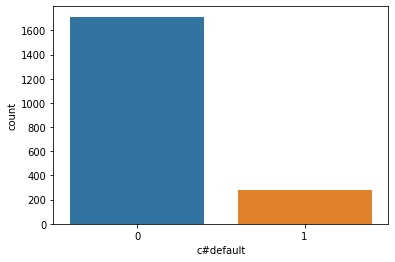

In [6]:
import seaborn as sns
sns.countplot(dataset['c#default']);

In [7]:
X = dataset.iloc[:, 1:4].values

In [8]:
X.shape

(1997, 3)

In [9]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [10]:
y = dataset.iloc[:, 4].values
y.shape

(1997,)

In [11]:
y

array([0, 0, 0, ..., 1, 0, 0])

## Base de treinamento e teste

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

### Teste amostragem estratificada

In [14]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

Devem possui um número igual de registros

In [15]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [16]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [17]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [18]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [19]:
1371 / len(y_treinamento), 226 / len(y_treinamento)

(0.8584846587351284, 0.14151534126487164)

Possuem a mesma proporção (amostra estratificada feita corretamente).

In [20]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [21]:
57 / len(y_teste)

0.1425

Amostra estratificada feita corretamente.

## Classificação com Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

Treinando o algoritmo:

In [38]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

Fazendo as previsões:

In [39]:
previsoes = modelo.predict(X_teste)

In [40]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,

Comparando o quanto foi bem o algoritmo

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_teste,previsoes)

0.91

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[335,   8],
       [ 28,  29]])

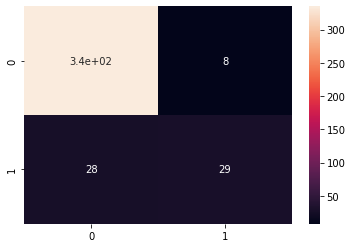

In [46]:
sns.heatmap(cm, annot=True)

In [47]:
(336 + 33)/ (336 + 24 + 7 + 33)

0.9225

In [48]:
# Percentual de acerto para pessoas que pagaram
336 / (336 + 7)
# Mais registro, faz com ele classifica melhor

0.9795918367346939

In [49]:
# Percentual de acerto para pessoas que não pagaram
33 / (33 + 24)

0.5789473684210527

In [50]:
# Perdas: 5000
# Clientes não pagadores: 1000
1000 * 43 / 100

430.0

In [51]:
430 * 5000     # Dá o prejuízo

2150000

## Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

Importando a biblioteca que possui a técnica TomekLinks

In [ ]:
from imblearn.under_sampling import TomekLinks

Vai apagar apenas registros da classe majoritária, quando um registro encontra-se em TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [ ]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

Diminuiu apenas os registros da classe 0.

In [ ]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

Separação da base de dados (depois do undersampling). A maior parte para treinamento e a menor para testes.

In [ ]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [ ]:
modelo_u = GaussianNB()  # Carrega o modelo
modelo_u.fit(X_treinamento_u, y_treinamento_u)   # Treina o modelo
previsoes_u = modelo_u.predict(X_teste_u)   # Damos a base teste e ele criaria previria um y_teste

Depois comparamos os resultados

In [ ]:
accuracy_score(previsoes_u, y_teste_u)

0.9131578947368421

In [ ]:
cm_u = confusion_matrix(y_teste_u, previsoes_u)
cm_u

array([[315,   8],
       [ 25,  32]])

In [ ]:
315 / (315 + 8)

0.9752321981424149

In [ ]:
32 / (25 + 32)

0.5614035087719298

## Sobreamostragem (oversampling) - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [ ]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

Com essa técnica, foram gerados mais registros da classe minoritária (1) de modo que o número fosse igual ao da classe majoritária (0).

In [ ]:
np.unique(y, return_counts=True), np.unique(y_over, return_counts=True)

((array([0, 1]), array([1714,  283])), (array([0, 1]), array([1714, 1714])))

In [ ]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [ ]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [ ]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(y_teste_o, previsoes_o)

0.9052478134110787

In [ ]:
cm_o = confusion_matrix(y_teste_o, previsoes_o)
cm_o

array([[296,  47],
       [ 18, 325]])

In [ ]:
296 / (296 + 47)

0.8629737609329446

In [ ]:
325 / (18 + 325)

0.9475218658892128

In [ ]:
# Perdas: 5000
# Clientes não pagadores: 1000
1000 * 6 / 100

60.0

In [ ]:
60 * 5000

300000

In [ ]:
2150000 - 300000  # O quanto o prejuízo diminuiu

1850000